In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

import random
from pathlib import Path
from time import time

from Covid19Classification.enhancement.filters import (
    histogram_equalization,
    bilateral_filter,
    clahe_filter,
    total_variation_denoising,
    lime
)
from Covid19Classification.enhancement.metrics import compute_enhancement_metrics

In [2]:
def readImageGrayscale(filename: np.ndarray) -> np.ndarray:
    return cv2.imread(filename, cv2.COLOR_BGR2GRAY)

In [3]:
def show_images(images):
    _, axes = plt.subplots(2, 4, figsize=(15, 6))

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i], cmap="gray")
        ax.axis("off")

    plt.tight_layout()
    plt.show()

In [4]:
random.seed(19)

path = Path("../data/raw")
images_paths = [image_path for image_path in path.rglob("*/images/*.png")]

sample_size = 8
sample_paths = random.sample(images_paths, sample_size)

images = [readImageGrayscale(filename.as_posix()) for filename in sample_paths]

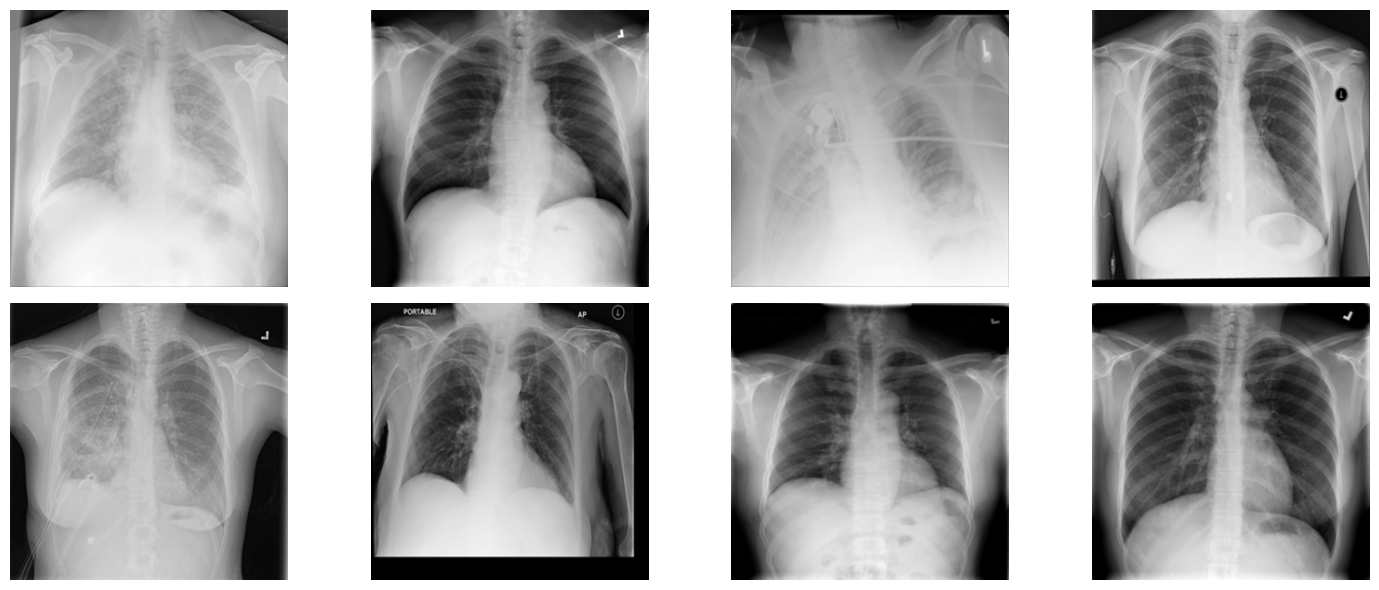

In [5]:
show_images(images)

## Equalização de histograma

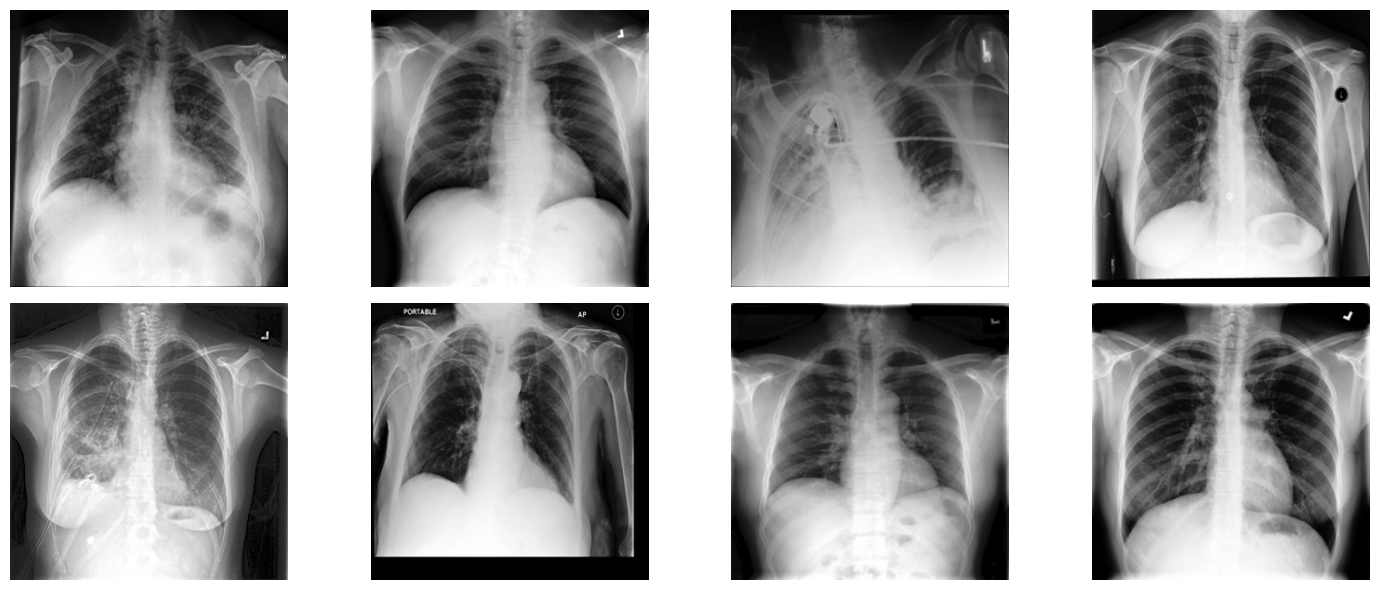

In [6]:
result_he = [histogram_equalization(image) for image in images]
show_images(result_he)

## Bilateral

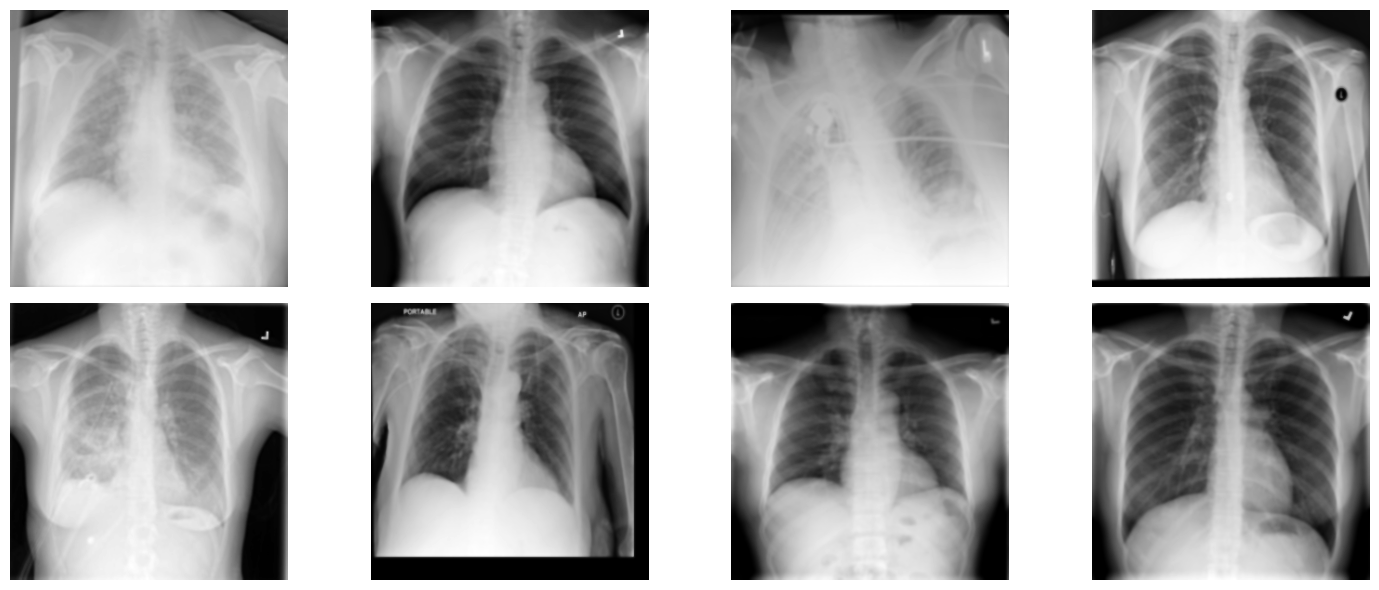

In [7]:
result_bilateral = [bilateral_filter(image) for image in images]
show_images(result_bilateral)

## CLAHE

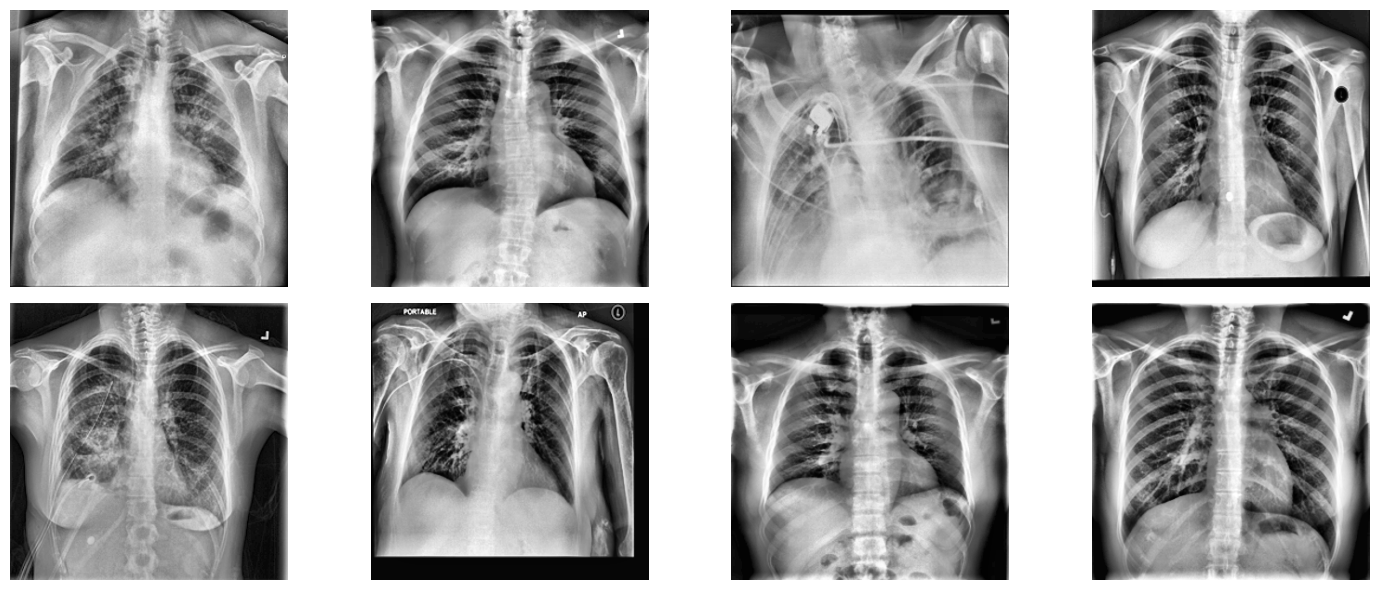

In [8]:
result_clahe = [clahe_filter(image) for image in images]
show_images(result_clahe)

## Total variation

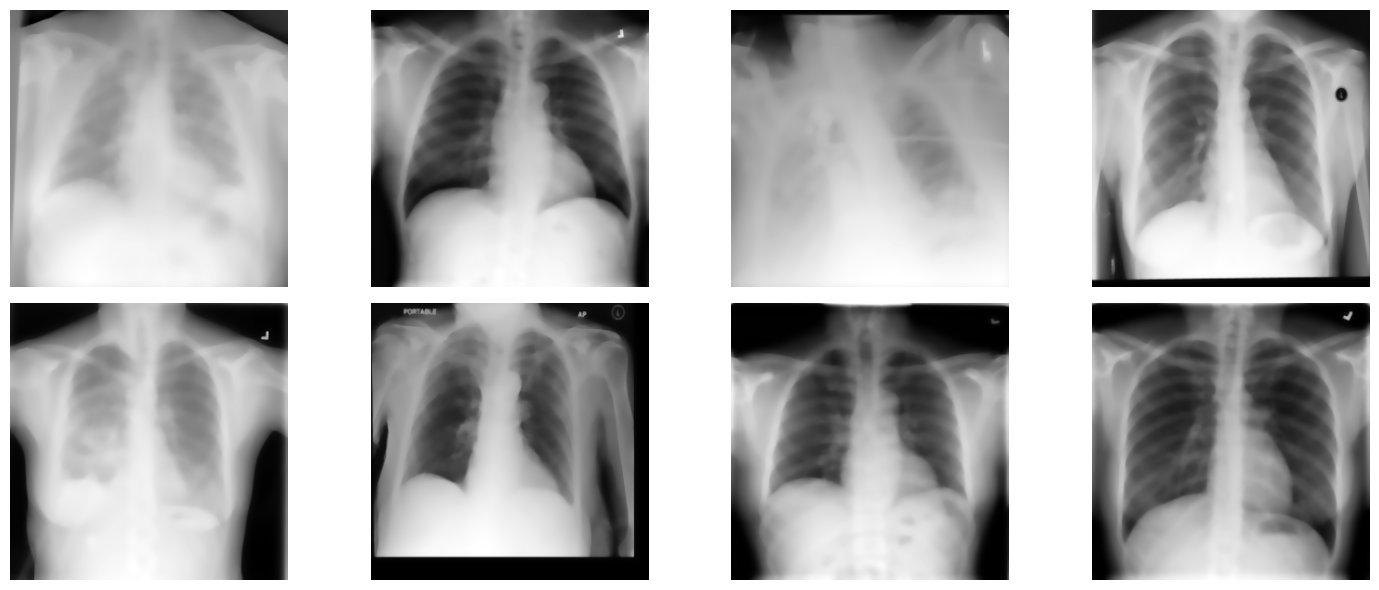

In [9]:
result_tv = [total_variation_denoising(image) for image in images]
show_images(result_tv)

## LIME

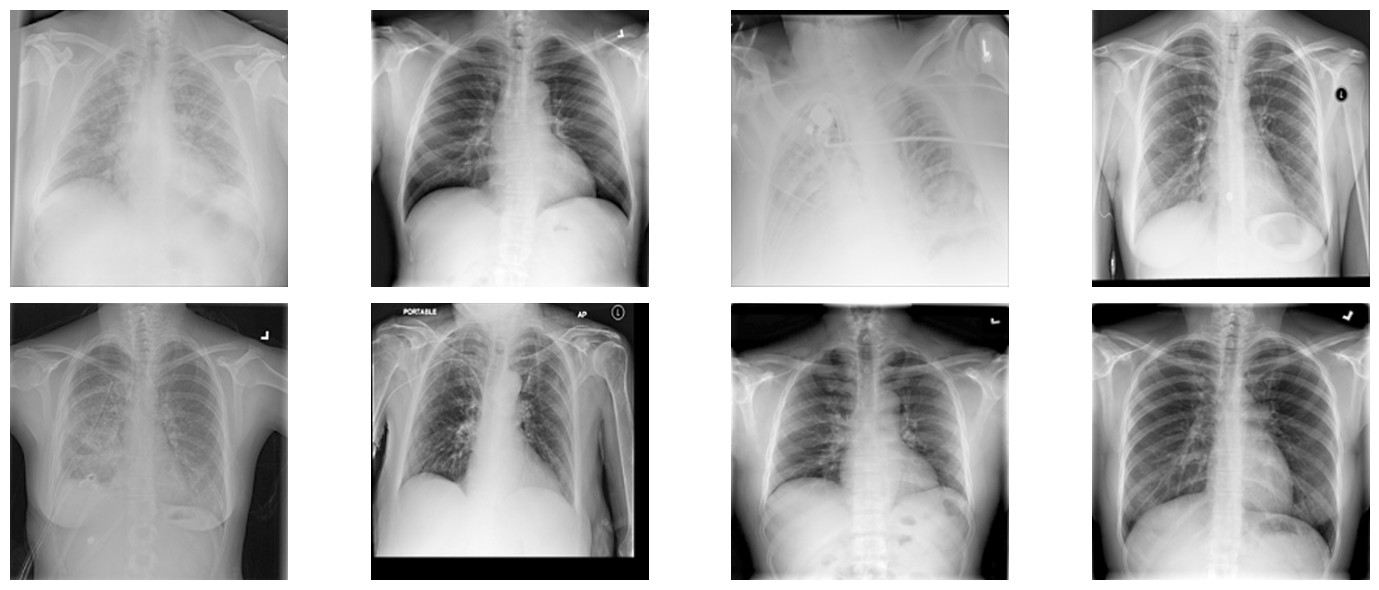

In [10]:
result_lime = [lime(image) for image in images]
show_images(result_lime)


# Em 100 imagens

In [11]:
sample_size = 100
sample_paths = random.sample(images_paths, sample_size)

images_test = [readImageGrayscale(filename.as_posix()) for filename in sample_paths]

In [12]:
techniques = {
    "Histogram Equalization": histogram_equalization,
    "Bilateral": bilateral_filter,
    "CLAHE": clahe_filter,
    "Total Variation": histogram_equalization,
    "LIME": lime
}

results = {}

for original_image in images_test:

    for technique_name, technique in techniques.items():
        if not results.get(technique_name):
            results[technique_name] = {}

        filter_results = results[technique_name]

        start_time = time()
        enhanced_image = technique(original_image)
        end_time = time()

        if len(enhanced_image.shape) > 2:
            enhanced_image = cv2.cvtColor(enhanced_image, cv2.COLOR_RGB2GRAY)

        metrics = compute_enhancement_metrics(original_image, enhanced_image)
        metrics["Execution Time (s)"] = end_time - start_time

        for metric_name, metric_value in metrics.items():
            if not filter_results.get(metric_name):
                filter_results[metric_name] = []

            filter_results[metric_name].append(metric_value)

## Médias dos resultados

In [13]:
for technique in techniques.keys():
    print(technique)
    for metric_name, metric_values in results[technique].items():
        if metric_name != "Execution Time (s)":
            print(f"-> {metric_name}: {np.mean(metric_values)}")
        else:
            print(f"-> Execution Time (ms): {round(np.mean(metric_values) * 1000, 2)}")

    print()

Histogram Equalization
-> RMSE: 9.636143348598413
-> AMBE: 23.602097627543323
-> PSNR: 28.08907049793301
-> SSIM: 0.869674384373882
-> Execution Time (ms): 0.12

Bilateral
-> RMSE: 2.6688411310128948
-> AMBE: 1.746814800729298
-> PSNR: 39.352471792587274
-> SSIM: 0.9668116119669056
-> Execution Time (ms): 0.89

CLAHE
-> RMSE: 9.931321215405593
-> AMBE: 27.794152526258088
-> PSNR: 27.80108625849077
-> SSIM: 0.6616490563959786
-> Execution Time (ms): 0.27

Total Variation
-> RMSE: 9.636143348598413
-> AMBE: 23.602097627543323
-> PSNR: 28.08907049793301
-> SSIM: 0.869674384373882
-> Execution Time (ms): 0.07

LIME
-> RMSE: 10.305435402890703
-> AMBE: 22.372168879542734
-> PSNR: 27.490611727665126
-> SSIM: 0.9256478995958547
-> Execution Time (ms): 853.14

